# Questão 3

Considere a tabela de índices de desenvolvimento de países abaixo. (questão extraída do Livro – Análise de dados através de métodos de estatística multivariada – Sueli A. Mingoti). Identifique os clusters existentes, i.e., o países com características mais similares.

(a) Aplicando uma técnica de clusterização hierárquica determine os clusters correspondentes

(b) Determine o SOM correspondente aos dados e com isto identifique os clusters existentes, i.e., o países com características mais similares.

## Imports das bibliotecas

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

## Carregando os dados

In [37]:
# Carregar os dados
data = pd.read_csv("./data3.csv")

# Selecionar apenas os dados numéricos para análise
numeric_data = data.drop(columns=["Países"])

numeric_data

,ExpectativaDeVida,Educação,PIB,EstabilidadePolítica
0,0.88,0.99,0.91,1.10
1,0.90,0.99,0.93,1.26
2,0.90,0.98,0.94,1.24
3,0.87,0.98,0.97,1.18
4,0.93,0.93,0.90,1.20
5,0.89,0.97,0.85,1.04
6,0.88,0.87,0.83,1.41
7,0.81,0.92,0.70,0.55
8,0.82,0.92,0.65,1.05
9,0.75,0.90,0.40,0.07


## Clusterização hierárquica

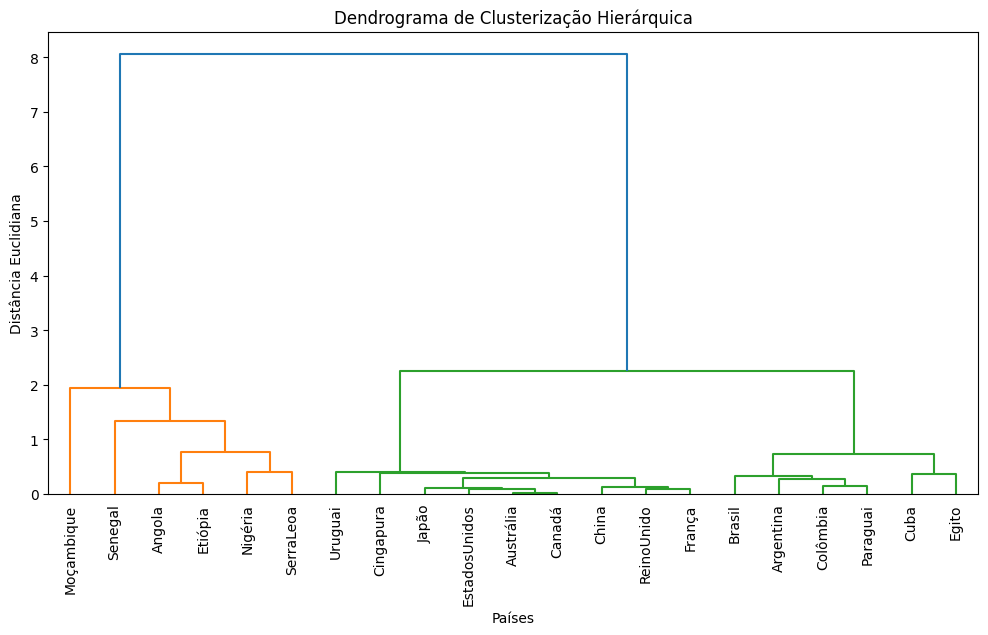

In [38]:
# 1. Criar a matriz de linkage
linkage_matrix = linkage(numeric_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=data["Países"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma de Clusterização Hierárquica")
plt.xlabel("Países")
plt.ylabel("Distância Euclidiana")
plt.show()

## Ajustes nos clusters

In [39]:
num_clusters = 3
clusters_hierarchical = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Adicionar os clusters ao dataframe
data['Cluster_Hierárquico'] = clusters_hierarchical

## Configurações do SOM

In [40]:
# Normalizar os dados numéricos para o SOM
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(numeric_data)

# Configurar o SOM
som_shape = (3, 3)
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=data_normalized.shape[1], sigma=1.0, learning_rate=1)
som.random_weights_init(data_normalized)

# 100 iterações no treino do SOM
som.train_random(data_normalized, 100)  

# Identificar os clusters SOM
cluster_som = [som.winner(x) for x in data_normalized]

# Adicionar os clusters do SOM ao dataframe
data['Cluster_SOM'] = [f"{x[0]}-{x[1]}" for x in cluster_som]

## Exibir resultados

- Cluster 1: Países menos desenvolvidos (Nigéria, Senegal, Serra Leoa, Angola, Etiópia, Moçambique).
- Cluster 2: Países mais desenvolvidos ou com características de alto desenvolvimento (Reino Unido, Austrália, Canadá, Estados Unidos, Japão, França, Cingapura, Uruguai, China).
- Cluster 3: Países com desenvolvimento intermediário ou misto (Argentina, Cuba, Colômbia, Brasil, Paraguai, Egito).

In [41]:
# Exibir os resultados
print("Resultados da Clusterização Hierárquica:")
print(data[["Países", "Cluster_Hierárquico"]])

print("\nResultados da Clusterização SOM:")
print(data[["Países", "Cluster_SOM"]])


Resultados da Clusterização Hierárquica:
           Países  Cluster_Hierárquico
0      ReinoUnido                    2
1       Austrália                    2
2          Canadá                    2
3   EstadosUnidos                    2
4           Japão                    2
5          França                    2
6       Cingapura                    2
7       Argentina                    3
8         Uruguai                    2
9            Cuba                    3
10       Colômbia                    3
11         Brasil                    3
12       Paraguai                    3
13          Egito                    3
14        Nigéria                    1
15        Senegal                    1
16      SerraLeoa                    1
17         Angola                    1
18        Etiópia                    1
19     Moçambique                    1
20          China                    2

Resultados da Clusterização SOM:
           Países Cluster_SOM
0      ReinoUnido         0-0
1      

## Plot do SOM

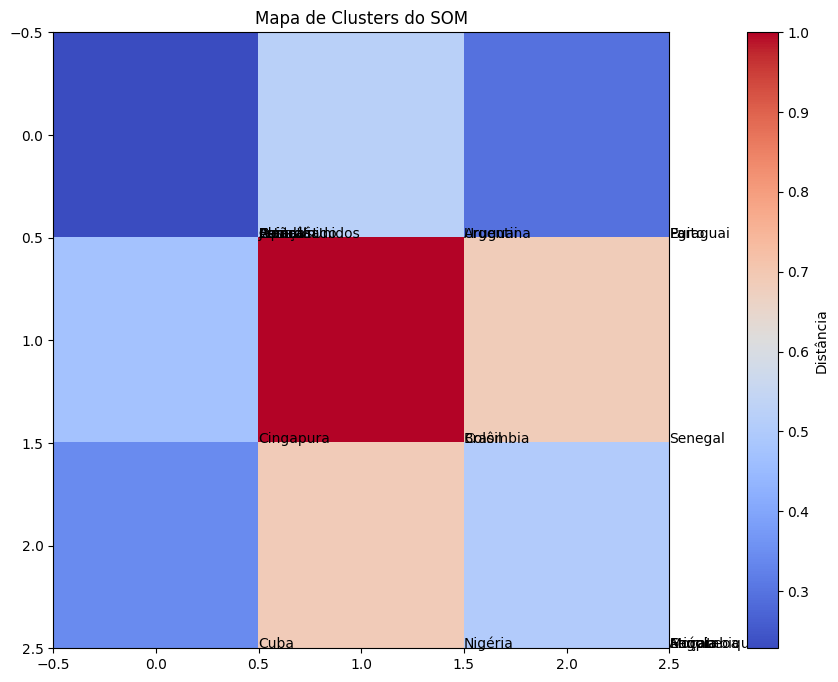

In [42]:
# Visualizar o SOM (Mapa de U)
plt.figure(figsize=(20, 8))
plt.title("Mapa de Clusters do SOM")
for i, x in enumerate(data_normalized):
    cluster_position = som.winner(x)
    plt.text(cluster_position[0] + 0.5, cluster_position[1] + 0.5, data["Países"][i], fontsize=10)
plt.imshow(som.distance_map().T, cmap="coolwarm")  # Mapa de distâncias
plt.colorbar(label="Distância")
plt.show()